In [ ]:
#trained ml model

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

df=pd.read_csv('data.csv').drop(columns=['Unnamed: 0']).\
    rename(columns={'Sybil':'sybil','id':'profile_id',
                    'num_comment':'comments','num_friend':'friends',
                    'num_post_on_wall':'posts','num_reaction':'likes',
                    'num_share_on_own_post':'shares',
                    'num_tagged_post':'tagged'})\
                    [['sybil','profile_id','comments','friends','posts','likes','shares','tagged']]

df=df.fillna(0)

df['profile_id']=df['profile_id'].astype(str)
df['comments']=df['comments'].astype(int)
df['friends']=df['friends'].astype(int)
df['posts']=df['posts'].astype(int)
df['likes']=df['likes'].astype(int)
df['shares']=df['shares'].astype(int)
df['tagged']=df['tagged'].astype(int)

#implement oversampling strategy
import collections
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)# fit predictor and target variable

x=df
y=df['sybil']

x_resampled, y_resampled = ros.fit_resample(x, y)

print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_resampled))

# train & test split (using train dataset)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x_resampled.drop(columns=['sybil','profile_id']), 
                                                   y_resampled, test_size=0.30, random_state=1)


# normalisation to ensure certain predictor variable won't effect final prediction more than other feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# feature selection Chi2

from sklearn.feature_selection import SelectKBest, chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all') #chi-square as score function
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# feature selection F Value

from sklearn.feature_selection import SelectKBest, f_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all') #f_classif as score function
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

    
# train & test (cross validation)
X_cv = scaler.fit_transform(x_resampled.drop(columns=['sybil','profile_id']))
y_cv = y_resampled


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data.csv').drop(columns=['Unnamed: 0']).\
    rename(columns={'Sybil':'sybil','id':'profile_id',
                    'num_comment':'comments','num_friend':'friends',
                    'num_post_on_wall':'posts','num_reaction':'likes',
                    'num_share_on_own_post':'shares',
                    'num_tagged_post':'tagged'})\
                    [['sybil','profile_id','comments','friends','posts','likes','shares','tagged']]

df=df.fillna(0)

df['profile_id']=df['profile_id'].astype(str)
df['comments']=df['comments'].astype(int)
df['friends']=df['friends'].astype(int)
df['posts']=df['posts'].astype(int)
df['likes']=df['likes'].astype(int)
df['shares']=df['shares'].astype(int)
df['tagged']=df['tagged'].astype(int)

df

,sybil,profile_id,comments,friends,posts,likes,shares,tagged
0,1,1364755875,206,7,389,1780,88,1869
1,0,100000301193027,57,0,41,286,1,16
2,0,100000680213088,44,12,3,622,1,392
3,1,100011206983282,26,2,2,551,2,39
4,0,100005515091928,47,6,95,165,2,42
...,...,...,...,...,...,...,...,...
1578,1,100009290639766,0,0,0,9,0,0
1579,1,100004174719565,0,0,0,7,0,0
1580,0,100001458164950,0,0,0,7,0,0
1581,1,100008612553786,0,0,0,7,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sybil       1583 non-null   int64 
 1   profile_id  1583 non-null   object
 2   comments    1583 non-null   int64 
 3   friends     1583 non-null   int64 
 4   posts       1583 non-null   int64 
 5   likes       1583 non-null   int64 
 6   shares      1583 non-null   int64 
 7   tagged      1583 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 99.1+ KB


In [4]:
df.groupby('sybil').count()['profile_id']#require oversampling for sybil account

sybil
0    1288
1     295
Name: profile_id, dtype: int64

In [5]:
#implement oversampling strategy

import collections
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)# fit predictor and target variable

x=df
y=df['sybil']

x_resampled, y_resampled = ros.fit_resample(x, y)

print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_resampled))

original dataset shape: Counter({0: 1288, 1: 295})
Resample dataset shape Counter({1: 1288, 0: 1288})


In [6]:
# train & test (using train dataset)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x_resampled.drop(columns=['sybil','profile_id']), y_resampled, test_size=0.30, random_state=1)


In [7]:
pd.DataFrame(y_test).reset_index().groupby('sybil').count()

,index
sybil,
0,396
1,377


In [8]:
# normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) # normalisation to ensure certain predictor variable won't effect final prediction more than other f
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [9]:
from sklearn.preprocessing import *

# prepare input data (no requirement since all input features are numerical value)
'''
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc'''

'''
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''


'''#prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)'''

'''# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)'''

''''''

''

In [10]:
# feature selection Chi2

from sklearn.feature_selection import SelectKBest, chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all') #chi-square as score function
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.204797
Feature 1: 2.175510
Feature 2: 1.749112
Feature 3: 12.384694
Feature 4: 1.721939
Feature 5: 1.598494


In [11]:
#features ranks
x_resampled.drop(columns=['sybil','profile_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   comments  2576 non-null   int64
 1   friends   2576 non-null   int64
 2   posts     2576 non-null   int64
 3   likes     2576 non-null   int64
 4   shares    2576 non-null   int64
 5   tagged    2576 non-null   int64
dtypes: int64(6)
memory usage: 120.9 KB


In [12]:
# feature selection F Value

from sklearn.feature_selection import SelectKBest, f_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all') #f_classif as score function
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.933777
Feature 1: 7.992544
Feature 2: 6.900098
Feature 3: 59.813233
Feature 4: 2.281710
Feature 5: 4.929851


In [13]:
# train & test (cross validation)

X_cv = scaler.fit_transform(x_resampled.drop(columns=['sybil','profile_id']))
y_cv = y_resampled

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

# fit the model
gnb = GaussianNB()
gnb.fit(X_train_fs, y_train)
# evaluate the model
yhat = gnb.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
print('--------------- 70% & 30% Split Model Performance Report ---------------')
print()
print('Accuracy considering all features (Gaussian Naive Bayes): %.2f' % (accuracy*100))
print('Precision considering all features (Gaussian Naive Bayes): %.2f' % (precision*100))
print()
print('########################################################################')
print()
print('Confusion Matrix Report')
print()
tn, fp, fn, tp =metrics.confusion_matrix(y_test, yhat).ravel()
print('True Negative (TN): ',tn)
print('False Positive (FP): ',fp)
print('False Negative (FN): ',fn)
print('True Positive (TP): ',tp)
print()
print('########################################################################')
print()
print('Classification Report')
print(metrics.classification_report(y_test, yhat))
print('########################################################################')
print()
print('-------------- 10 Folds Cross Validation Model Performance --------------')
print()
print('10 Fold Cross Validation Score (Average Accuracy) : %.2f' % \
      (cross_val_score(gnb, X_cv, y_cv, cv=10,scoring='accuracy').mean().round(4)*100))
print('10 Fold Cross Validation Score (Average Precision) : %.2f' % \
      (cross_val_score(gnb, X_cv, y_cv, cv=10,scoring='precision').mean().round(4)*100))
print()


--------------- 70% & 30% Split Model Performance Report ---------------

Accuracy considering all features (Gaussian Naive Bayes): 56.79
Precision considering all features (Gaussian Naive Bayes): 85.25

########################################################################

Confusion Matrix Report

True Negative (TN):  387
False Positive (FP):  9
False Negative (FN):  325
True Positive (TP):  52

########################################################################

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.98      0.70       396
           1       0.85      0.14      0.24       377

    accuracy                           0.57       773
   macro avg       0.70      0.56      0.47       773
weighted avg       0.69      0.57      0.47       773

########################################################################

-------------- 10 Folds Cross Validation Model Performance --------------

10 Fold Cross Validation 

In [15]:
metrics.confusion_matrix(y_test, yhat).ravel()

array([387,   9, 325,  52])

In [16]:
metrics.confusion_matrix(y_test, yhat)

array([[387,   9],
       [325,  52]])

In [17]:
from sklearn.ensemble import RandomForestClassifier

# fit the model
rf = RandomForestClassifier()
rf.fit(X_train_fs, y_train)
# evaluate the model
yhat = rf.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
print('--------------- 70% & 30% Split Model Performance Report ---------------')
print()
print('Accuracy considering all features (Random Forest): %.2f' % (accuracy*100))
print('Precision considering all features (Random Forest): %.2f' % (precision*100))
print()
print('########################################################################')
print()
print('Confusion Matrix Report')
print()
tn, fp, fn, tp =metrics.confusion_matrix(y_test, yhat).ravel()
print('True Negative (TN): ',tn)
print('False Positive (FP): ',fp)
print('False Negative (FN): ',fn)
print('True Positive (TP): ',tp)
print()
print('########################################################################')
print()
print('Classification Report')
print(metrics.classification_report(y_test, yhat))
print('########################################################################')
print()
print('-------------- 10 Folds Cross Validation Model Performance --------------')
print()
print('10 Fold Cross Validation Score (Average Accuracy) : %.2f' % \
      (cross_val_score(rf, X_cv, y_cv, cv=10,scoring='accuracy').mean().round(4)*100))
print('10 Fold Cross Validation Score (Average Precision) : %.2f' % \
      (cross_val_score(rf, X_cv, y_cv, cv=10,scoring='precision').mean().round(4)*100))
print()


--------------- 70% & 30% Split Model Performance Report ---------------

Accuracy considering all features (Random Forest): 74.77
Precision considering all features (Random Forest): 79.35

########################################################################

Confusion Matrix Report

True Negative (TN):  332
False Positive (FP):  64
False Negative (FN):  131
True Positive (TP):  246

########################################################################

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       396
           1       0.79      0.65      0.72       377

    accuracy                           0.75       773
   macro avg       0.76      0.75      0.74       773
weighted avg       0.75      0.75      0.75       773

########################################################################

-------------- 10 Folds Cross Validation Model Performance --------------

10 Fold Cross Validation Score (Avera

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# fit the model
knn = KNeighborsClassifier()
knn.fit(X_train_fs, y_train)
# evaluate the model
yhat = knn.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
print('--------------- 70% & 30% Split Model Performance Report ---------------')
print()
print('Accuracy considering all features (KNN): %.2f' % (accuracy*100))
print('Precision considering all features (KNN): %.2f' % (precision*100))
print()
print('########################################################################')
print()
print('Confusion Matrix Report')
print()
tn, fp, fn, tp =metrics.confusion_matrix(y_test, yhat).ravel()
print('True Negative (TN): ',tn)
print('False Positive (FP): ',fp)
print('False Negative (FN): ',fn)
print('True Positive (TP): ',tp)
print()
print('########################################################################')
print()
print('Classification Report')
print(metrics.classification_report(y_test, yhat))
print('########################################################################')
print()
print('-------------- 10 Folds Cross Validation Model Performance --------------')
print()
print('10 Fold Cross Validation Score (Average Accuracy) : %.2f' % \
      (cross_val_score(knn, X_cv, y_cv, cv=10,scoring='accuracy').mean().round(4)*100))
print('10 Fold Cross Validation Score (Average Precision) : %.2f' % \
      (cross_val_score(knn, X_cv, y_cv, cv=10,scoring='precision').mean().round(4)*100))
print()


--------------- 70% & 30% Split Model Performance Report ---------------

Accuracy considering all features (KNN): 68.82
Precision considering all features (KNN): 66.59

########################################################################

Confusion Matrix Report

True Negative (TN):  259
False Positive (FP):  137
False Negative (FN):  104
True Positive (TP):  273

########################################################################

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       396
           1       0.67      0.72      0.69       377

    accuracy                           0.69       773
   macro avg       0.69      0.69      0.69       773
weighted avg       0.69      0.69      0.69       773

########################################################################

-------------- 10 Folds Cross Validation Model Performance --------------

10 Fold Cross Validation Score (Average Accuracy) : 80.4

In [19]:
from sklearn.neural_network import MLPClassifier

# fit the model
mlp = MLPClassifier()
mlp.fit(X_train_fs, y_train)
# evaluate the model
yhat = mlp.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
print('--------------- 70% & 30% Split Model Performance Report ---------------')
print()
print('Accuracy considering all features (MLP): %.2f' % (accuracy*100))
print('Precision considering all features (MLP): %.2f' % (precision*100))
print()
print('########################################################################')
print()
print('Confusion Matrix Report')
print()
tn, fp, fn, tp =metrics.confusion_matrix(y_test, yhat).ravel()
print('True Negative (TN): ',tn)
print('False Positive (FP): ',fp)
print('False Negative (FN): ',fn)
print('True Positive (TP): ',tp)
print()
print('########################################################################')
print()
print('Classification Report')
print(metrics.classification_report(y_test, yhat))
print('########################################################################')
print()
print('-------------- 10 Folds Cross Validation Model Performance --------------')
print()
print('10 Fold Cross Validation Score (Average Accuracy) : %.2f' % \
      (cross_val_score(mlp, X_cv, y_cv, cv=10,scoring='accuracy').mean().round(4)*100))
print('10 Fold Cross Validation Score (Average Precision) : %.2f' % \
      (cross_val_score(mlp, X_cv, y_cv, cv=10,scoring='precision').mean().round(4)*100))
print()


--------------- 70% & 30% Split Model Performance Report ---------------

Accuracy considering all features (MLP): 62.23
Precision considering all features (MLP): 68.09

########################################################################

Confusion Matrix Report

True Negative (TN):  321
False Positive (FP):  75
False Negative (FN):  217
True Positive (TP):  160

########################################################################

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       396
           1       0.68      0.42      0.52       377

    accuracy                           0.62       773
   macro avg       0.64      0.62      0.61       773
weighted avg       0.64      0.62      0.61       773

########################################################################

-------------- 10 Folds Cross Validation Model Performance --------------

10 Fold Cross Validation Score (Average Accuracy) : 64.64

In [43]:
samples = pd.read_csv('samples.csv')
samples

,profile_id,friends,posts,likes,comments,shares,tagged
0,100001191362333,1035,11,97196,3718,69865,1
1,1473503761,0,11,5947,1450,22760,1
2,100001466497404,78305,20,4840,307,527,10
3,504858061,1364,16,4105,179,6216,6
4,100000908173636,65,11,2043,265,272656,1
...,...,...,...,...,...,...,...
194,100006119281712,193,10,0,0,0,0
195,100063991811162,336,10,0,0,0,0
196,103286557716393,0,2,0,0,0,0
197,100001147420162,6779,10,0,0,0,0


In [44]:
predicted_syibil=rf.predict(samples.drop(columns=['profile_id']).to_numpy())
predicted_syibil


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [45]:
proba_syibil=rf.predict_proba(samples.drop(columns=['profile_id']).to_numpy()) #probability based prediction
proba_syibil=pd.DataFrame(proba_syibil)
proba_syibil=proba_syibil[[0,1]].max(axis=1).values
proba_syibil


array([0.56, 0.72, 0.56, 0.56, 0.56, 0.56, 0.57, 0.53, 0.57, 0.57, 0.56,
       0.53, 0.57, 0.57, 0.56, 0.53, 0.56, 0.57, 0.57, 0.57, 0.53, 0.57,
       0.57, 0.56, 0.53, 0.64, 0.57, 0.57, 0.57, 0.56, 0.57, 0.57, 0.56,
       0.64, 0.56, 0.57, 0.56, 0.55, 0.57, 0.56, 0.57, 0.63, 0.57, 0.57,
       0.55, 0.57, 0.57, 0.57, 0.57, 0.64, 0.64, 0.57, 0.56, 0.55, 0.53,
       0.53, 0.53, 0.57, 0.57, 0.57, 0.57, 0.57, 0.64, 0.57, 0.57, 0.56,
       0.53, 0.56, 0.57, 0.57, 0.57, 0.54, 0.57, 0.57, 0.54, 0.57, 0.56,
       0.65, 0.64, 0.53, 0.64, 0.57, 0.54, 0.57, 0.53, 0.57, 0.57, 0.57,
       0.64, 0.57, 0.56, 0.54, 0.56, 0.55, 0.54, 0.55, 0.57, 0.64, 0.57,
       0.54, 0.57, 0.57, 0.57, 0.57, 0.63, 0.65, 0.57, 0.54, 0.65, 0.64,
       0.64, 0.65, 0.54, 0.57, 0.57, 0.57, 0.57, 0.57, 0.55, 0.54, 0.64,
       0.63, 0.64, 0.57, 0.57, 0.55, 0.53, 0.65, 0.57, 0.57, 0.57, 0.57,
       0.57, 0.65, 0.57, 0.65, 0.54, 0.65, 0.57, 0.55, 0.65, 0.65, 0.54,
       0.51, 0.53, 0.57, 0.57, 0.64, 0.65, 0.54, 0.

In [46]:
samples['predicted_syibil']=predicted_syibil
samples['proba_syibil']=proba_syibil
samples

,profile_id,friends,posts,likes,comments,shares,tagged,predicted_syibil,proba_syibil
0,100001191362333,1035,11,97196,3718,69865,1,1,0.56
1,1473503761,0,11,5947,1450,22760,1,1,0.72
2,100001466497404,78305,20,4840,307,527,10,1,0.56
3,504858061,1364,16,4105,179,6216,6,1,0.56
4,100000908173636,65,11,2043,265,272656,1,1,0.56
...,...,...,...,...,...,...,...,...,...
194,100006119281712,193,10,0,0,0,0,0,0.72
195,100063991811162,336,10,0,0,0,0,0,0.72
196,103286557716393,0,2,0,0,0,0,0,0.64
197,100001147420162,6779,10,0,0,0,0,0,0.72


In [47]:
samples[samples['predicted_syibil']==1].count()

profile_id          43
friends             43
posts               43
likes               43
comments            43
shares              43
tagged              43
predicted_syibil    43
proba_syibil        43
dtype: int64

In [48]:
samples[samples['predicted_syibil']==0].count()

profile_id          156
friends             156
posts               156
likes               156
comments            156
shares              156
tagged              156
predicted_syibil    156
proba_syibil        156
dtype: int64

In [26]:
samples.groupby('predicted_syibil').count()

,profile_id,friends,posts,likes,comments,shares,tagged,proba_syibil
predicted_syibil,,,,,,,,
0,156,156,156,156,156,156,156,156
1,43,43,43,43,43,43,43,43


In [27]:
#df1=pd.read_excel('data.xlsx',engine='openpyxl',sheet_name='fake_information').drop_duplicates()[['fb_id','status']][0:199]
#df1['fb_id']=df1['fb_id'].str.replace('https\://www\.facebook\.com/','').str.strip()
#df1['fb_id']=df1['fb_id'].str.replace('profile\.php\?id\=','').str.strip()
#df1

In [28]:
df1=pd.read_csv('fake_information.csv').drop_duplicates()[['fb_id','status']][0:199]
df1['fb_id']=df1['fb_id'].str.replace('https\://www\.facebook\.com/','').str.strip()
df1['fb_id']=df1['fb_id'].str.replace('profile\.php\?id\=','').str.strip()
df1

,fb_id,status
0,emi.lepar,originator
1,aisah.lolettah,originator
2,kisuke.uruhara.10,originator
3,iqma.dasmooth,originator
4,rezahassan81,originator
...,...,...
194,huisengkin,originator
195,mark.koh.716,originator
196,teng.s.wei,originator
197,107-What-Say-I-Say-105170197872074/,originator


In [29]:
df2=pd.read_csv('profile_posts.csv')[['user_id','user_url']]
df2['user_url']=df2['user_url'].str.split('?',expand=True)[0]
df2=df2.rename(columns={'user_url':'fb_id'})
df2['fb_id']=df2['fb_id'].str.replace('https\://facebook\.com/','').str.strip()
df2['fb_id']=df2['fb_id'].str.replace('profile\.php\?id\=','').str.strip()
df2

,user_id,fb_id
0,100040361416013,nazreen.mahmood.90
1,100001755837476,mohdfaizal.sts
2,100001818461658,fariszuan.yusof
3,100001912965297,emi.lepar
4,100001912965297,emi.lepar
...,...,...
2058,1519350397,rohaizad.roslan.9
2059,1519350397,rohaizad.roslan.9
2060,1519350397,rohaizad.roslan.9
2061,1519350397,rohaizad.roslan.9


In [30]:
df=pd.merge(df1,df2,how='left',on='fb_id').drop_duplicates()
df['user_id']=np.where(df['user_id'].isnull(),df['fb_id'],df['user_id'])
df=df.rename(columns={'user_id':'profile_id'})
df['profile_id']=df['profile_id'].astype(str).str.replace('\.0','')
df.to_csv('fb_id.csv',index=False)

In [31]:
samples['profile_id']=samples['profile_id'].astype(str).str.strip()
samples=pd.merge(samples,df[['profile_id','status']],how='left',on='profile_id')
samples

,profile_id,friends,posts,likes,comments,shares,tagged,predicted_syibil,proba_syibil,status
0,100001191362333,1035,11,97196,3718,69865,1,1,0.56,sharer
1,1473503761,0,11,5947,1450,22760,1,1,0.72,originator
2,100001466497404,78305,20,4840,307,527,10,1,0.56,originator
3,504858061,1364,16,4105,179,6216,6,1,0.56,originator
4,100000908173636,65,11,2043,265,272656,1,1,0.56,sharer
...,...,...,...,...,...,...,...,...,...,...
194,100006119281712,193,10,0,0,0,0,0,0.72,sharer
195,100063991811162,336,10,0,0,0,0,0,0.72,sharer
196,103286557716393,0,2,0,0,0,0,0,0.64,originator
197,100001147420162,6779,10,0,0,0,0,0,0.72,sharer


In [32]:
samples['status']=np.where(samples['status'].isnull(),'sharer',samples['status'])
samples

,profile_id,friends,posts,likes,comments,shares,tagged,predicted_syibil,proba_syibil,status
0,100001191362333,1035,11,97196,3718,69865,1,1,0.56,sharer
1,1473503761,0,11,5947,1450,22760,1,1,0.72,originator
2,100001466497404,78305,20,4840,307,527,10,1,0.56,originator
3,504858061,1364,16,4105,179,6216,6,1,0.56,originator
4,100000908173636,65,11,2043,265,272656,1,1,0.56,sharer
...,...,...,...,...,...,...,...,...,...,...
194,100006119281712,193,10,0,0,0,0,0,0.72,sharer
195,100063991811162,336,10,0,0,0,0,0,0.72,sharer
196,103286557716393,0,2,0,0,0,0,0,0.64,originator
197,100001147420162,6779,10,0,0,0,0,0,0.72,sharer


In [33]:
samples.to_csv('result.csv',index=False)

<AxesSubplot:ylabel='status'>

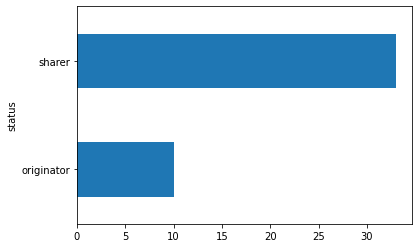

In [34]:
samples[(samples['predicted_syibil']==1)].groupby('status').count()['profile_id'].\
plot.barh()

<AxesSubplot:ylabel='status'>

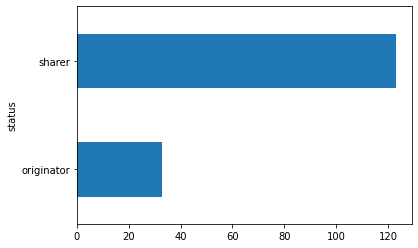

In [35]:
samples[~((samples['predicted_syibil']==1))].groupby('status').count()['profile_id'].\
plot.barh()
